# Relationship between Population, Air pollution and Respiratory diseases like COPD and Asthma

It is well known that _respiratory diseases_ are closely related to _air pollution_. Air pollutants can significantly affect the lungs and other parts of the respiratory system. When we breathe in air with pollutants that reach the lungs and other parts of the respiratory tract, it can cause irritation, inflammation, and damage. There are various factors that add to air pollution in a city, state, or country. Even different locations within a state, like counties, could have different amounts of air pollution. <br>

_Population_ may also affect air pollution. The increased population can lead to increased transportation, deforestation, factories and industries, house cooking, and heating. All of these aid in increasing air pollution. Therefore, regions with higher populations will also have increased air pollution and higher prevalence of respiratory diseases like COPD and Asthma. This study will investigate if there is _any relationship between population and air pollution, which in turn increases the risk of respiratory diseases (COPD and Asthma)._

### Identify Sources

#### Data Sources

 1. **Flat Files**
- **2021 SMART: BRFSS City and County Data**: 
    The Behavioral Risk Factor Surveillance System (BRFSS) is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. The Behavioral Risk Factor Surveillance System (BRFSS) Selected Metropolitan/Micropolitan Area Risk Trends (SMART) is a documented and verified subset of the 2021 BRFSS survey data that has been produced to provide some local-area estimates (CDC. n.d.).
This file contains BRFSS survey data released on 2021. The sataset is in ASCII fixed-width format. There are many variables in the dataset and some of which are coded and transformed. The dataset variable layout can be referred **[here][1]** and The definition of calculated variables can be referred in **[BRFSS website][2]**.

**[Link to dataset][3]**

The below variables will be extracted and used in this study from this dataset.

* _SEX - Gender
* WTKG3 - Weight in Kgs
* HEIGHT3 - Height in inches
* _BMI5 - Calculated Body mass index
* _SMOKER3 - Smoking status level (e.g. 1: current smoker, smokes ever day, 2: current smoker, smokes some days)
* _CURECI1 - Denotes whether repondent uses e-cigarette
* _LTASTH1 - Denotes whether repondent reported that they ever had Asthma
* _CASTHM1 - Denotes whether repondent reported that they currently have Asthma
* MMSANAME - Metropolitan Statistical Area name. This variable provides both state and county/main city name of the repondent

<br>

- **Estimated COPD prevalance by County**: 
    This dataset contains estimated COPD prevalence based on BRFSS survey data for counties. This dataset is a comma-separated file containing estimated COPD prevalence and its $95$% confidence interval, county name and state name.

**[Link to dataset][4]**

The below variables will used or referred in this study from this dataset.

* FullGeoName - Name of the location including State code and County
* StateDesc - State full nme
* County - County name
* Percent_COPD - Percentage estimates of COPD in a county.
<br>

[1]:https://www.cdc.gov/brfss/annual_data/2021/pdf/MMSA_VarLayout_21-508.pdf
[2]:https://www.cdc.gov/brfss/annual_data/2021/pdf/2021-calculated-variables-version4-508.pdf
[3]:https://www.cdc.gov/brfss/annual_data/2021/files/MMSA2021_ASC.zip
[4]:https://www.cdc.gov/copd/data-and-statistics/county-estimates.html

2. **API**
- **Air Pollution API**:
Air pollution api from OpenWeather provides current air pollution data like air quality index and particulates for a set of coordinates (latitude and longitude). We can pass latitude and longitude in the api request call to retrieve current air pollution data for that location.

[Link to API documentation][1]

- **Geocoding API**:
Geocoding API from OpenWeather provides geographical coordinates (latitude and longitude) using the location area name as input. We can pass the location area name (e.g., town), state code, and an ISO 3166 country code (like the US, UK, etc.) to retrieve the latitude and longitude for that location area.

[Link to API documentation][2]


For this study the below fields from the air pollution api response will be extracted and used

* _aqi_ - Air Quality Index.
* _co_ - Concentration of Carbon monoxide
* _no_ - Concentration of Nitrogen monoxide
* _no2_ - Concentration of Nitrogen dioxide
* _o3_ - Concentration of Ozone
* _pm2_5_ - Concentration of [Fine particles matter][3]
* _pm10_ - Concentration of [Coarse particulate matter][4]
* _nh3_ - Concentration of Ammonia

Possible values and levels mapping (e.g. low, high, moderate, etc.) can be referred in this [link][5].
<br>

[1]:https://openweathermap.org/api/air-pollution
[2]:https://openweathermap.org/api/geocoding-api#direct
[3]:https://en.wikipedia.org/wiki/Particulates
[4]:https://en.wikipedia.org/wiki/Particulates#Size,_shape_and_solubility_matter
[5]:https://openweathermap.org/air-pollution-index-levels

3. **Website**
- **Wikipedia - County statistics of the United States**:
Wikipedia [County statistics of the United States][1] page contains the links to further Wikipedia pages with county level statistics for the US states. These state level Wikipedia pages contain data like Population, Area, County seat or Main town for each counties within a state [e.g. Texas][2].
     
   ![Image][3]
   <center>Fig 1. Website snip from the Texas Wiki page showinf data layout</center>

**[Link to Website][4]**

From the _wikipedia_ website page, `County name`, `County Seat/Largest Town`, `Fips Code`, `Population` and `Area` will be extracted for this study. `County Seat` refers to the _main town_ within in a county.
    
[1]:https://en.wikipedia.org/wiki/County_statistics_of_the_United_States
[2]:https://en.wikipedia.org/wiki/List_of_counties_in_Texas
[3]:./texas.jpg
[4]:https://en.wikipedia.org/wiki/County_statistics_of_the_United_States


<br>

#### Relationships

**Flat Files**: _BRFSS Ascii format fixed width file_ contains survey data from respondents which includes various health related indicators including Asthma and also the location(county/town and state) the respondent belongs.
_COPD prevalence csv dataset_ contains the estimated COPD prevalence percentage by location(county and state).

**API**: _Geocoding Api_ provides latitude and longitude based on a location (town and state). _Air pollution api_ provides air pollution indicators based on latitude and longitude. Therefore, combining thes two apis we can retrieve air pollution indicators for a location (county main town and state).

**Website**: _Wikipedia_ website provides the population data by county, main town (county seat) and state.

The above `three` data sources are related by _location(county/town and state)_.

HTML pages of the website will be parsed using _web scraping_ to retrieve the area, population, county name, main town for each US state. This extracted data will be stored in a database table which will provide population for all counties for all US states. The latitude and longitude for the main town of a county will be identified utilizing the Geocoding API. Latitude and longitude will be then subsequently used to retrieve air pollution indicators for that town. Thus, air pollution indicators for the all the counties will be retrieved and stored in a database table. The ASCII flat file will be parsed to retrieve each respondent's Asthma response and smoking habits. The responses must be rolled up at the county level to calculate the Asthma prevalence and smoking habits percentage for each county. This data will be joined with the COPD prevalence CSV flat file and loaded in a single database table, which will serve as a source for both COPD and Asthma prevalence for all the counties. <br>

In each stage of retrieving and cleaning data from the source, the detection and the removal of outliers will also be performed. Further transformations like aggregation, grouping, filtering, subsetting, whitespace removal, string manipulation may also need to be implemented to cleanse or parse data. There might be challenges to read ASCII fixed width format data directly and custom data read functions might be needed to parse and read such data format<br> 

After the data from each source has been organized at the county level, those will be joined using county and state to create a single table or dataset, which will then serve as the source to generate visualizations for investigation of the relationship between population, air pollution and repiratory diseases.<br>

This study has some limitations such as _sampling bias_, _measurement error_, and lack of _causality_ inference. As the BRFSS SMART data is a telephonic survey, the sample of respondents who answered the interview might not be a complete representation of the population because some persons might not be willing to participate in the survey, and hence, there are chances that some communities are under-represented introducing sampling bias. Respondents may also mistakenly provide incorrect information or round up values, which will introduce measurement errors. The COPD prevalence dataset provides an estimated COPD percentage with a 95% confidence interval, which may deviate to a small extent from the actual COPD prevalence in a county. This study will not be able to offer any causality to conclude that increased population causes increased air pollution, which cause increases in respiratory diseases. This study can not confirm such cause-and-effect inferences. This study will be able to establish if a relationship exists between population, air pollution, and respiratory diseases but not conclude whether one is caused by the other.<br>

Ethical considerations are essential in any research study to ensure data privacy and the integrity of the research process. The BRFSS SMART survey data is anonymous, and no personal information is available to identify the respondents. Also, none of the other datasets contain any personally identifiable information. Therefore, there are no risks to data privacy associated with this study. The outcome of the study must be reported with transparency and integrity, irrespective of whether the results are consistent with the expectations and hypothesis.

### Cleaning/Formatting Flat File Sources

##### Step 1: Format BRFSS SMART fixed width ASCII dataset to a readable dataframe. Rename columns to lower case and subset only columns needed for this study.

The data dictionary of the BRFSS SMART ASCII dataset is a pdf file. We need to parse the pdf file to get the column names, start positions, and field lengths required to read the ASCII flat file. Convert the ascii dataset into a pandas dataframe with variable information extracted from the pdf file. Also, read the COPD prevalence dataset and create a pandas data frame. Convert the variable names to lowercase for consistency in column names.

###### BRFSS SMART dataset

In [104]:
# import required packages

import PyPDF2
import os
import re
import pandas as pd
from matplotlib import pyplot as plt

In [105]:
# The data dictionary for BRFSS SMART fixed width dataset is a pdf file - MMSA_VarLayout_21-508.pdf.
# We need to parse the pdf file to retrive column start position, column name, and and column length and store in a pandas dataframe for later use to
# read the ascii data file
data = []
with open('./datasets/MMSA_VarLayout_21-508.pdf', 'rb') as pdfFileObj:
    # creating a pdf reader object
    pdfReader = PyPDF2.PdfReader(pdfFileObj)
    for each_page in pdfReader.pages:
        # extracting text from page
        for text in each_page.extract_text().split("\n"):
            # using regex to match and extract column start position, column name, and column length
            matches = re.findall("^(\d{1,3})\s(\w+)\s+(\d{1,3})", text)
            if matches:
                data.append([matches[0][0],matches[0][1], matches[0][2]])

In [106]:
# Lets check few items in extracted data
data[0:5]

[['1', 'DISPCODE', '4'],
 ['5', 'SEQNO', '10'],
 ['15', 'STATERE1', '1'],
 ['16', 'CELPHON1', '1'],
 ['17', 'LADULT1', '1']]

In [107]:
# convert the extracted data to a datafarme
colnames_df = pd.DataFrame(data, columns=["start", "colname", "field_length"])

In [108]:
# Chek few rows of colnames dataframe
colnames_df.head()

,start,colname,field_length
0,1,DISPCODE,4
1,5,SEQNO,10
2,15,STATERE1,1
3,16,CELPHON1,1
4,17,LADULT1,1


In [109]:
# create subset of variable names to be extracted from BRFSS SMART ascii fixed width dataset
col_list = [
    "_SEX",
    "WTKG3", 
    "HEIGHT3",
    "_BMI5",
    "_SMOKER3",
    "_CURECI1",
    "_LTASTH1",
    "_CASTHM1",
    "MMSANAME"
]

In [110]:
# Filter only rows from colnames df needed for this study
required_colnames = colnames_df.query(f"colname in {col_list}").reset_index(drop=True)

In [111]:
# As python index starts 0, need to set start position accordingly
required_colnames["start"] = required_colnames["start"].astype("int") - 1

In [112]:
# Add end position column by claculating end position = start + length
required_colnames["end"] = required_colnames["start"] + required_colnames["field_length"].astype("int") 

In [113]:
# View required columns start and end position are calculated correctly
required_colnames

,start,colname,field_length,end
0,81,HEIGHT3,4,85
1,157,_LTASTH1,1,158
2,158,_CASTHM1,1,159
3,172,_SEX,1,173
4,179,WTKG3,5,184
5,184,_BMI5,4,188
6,192,_SMOKER3,1,193
7,194,_CURECI1,1,195
8,262,MMSANAME,100,362


In [114]:
# Converting to a list of start and end positions to be used as colspecs in pandas fixed width read (read_fwf function)
colspecs = required_colnames[["start", "end"]].values.tolist()

In [115]:
# creating a list of variable names from the colname column
col_list = required_colnames["colname"].tolist()

In [116]:
# Check column list to confirm required variables
col_list

['HEIGHT3',
 '_LTASTH1',
 '_CASTHM1',
 '_SEX',
 'WTKG3',
 '_BMI5',
 '_SMOKER3',
 '_CURECI1',
 'MMSANAME']

In [117]:
# Read the ascii file into a dataframe using the column specifications created above, replace any encoding errors with ? 
brfss_df = pd.read_fwf("./datasets/MMSA21.ASC", colspecs=colspecs, names=col_list, encoding_errors="replace")

In [118]:
# View few rows of the BRFSS dataframe
brfss_df.head()

,HEIGHT3,_LTASTH1,_CASTHM1,_SEX,WTKG3,_BMI5,_SMOKER3,_CURECI1,MMSANAME
0,509.0,1,1,1,10886.0,3544.0,3,1,"Aberdeen, SD, Micropolitan Statistical Area"
1,602.0,1,1,1,9979.0,2825.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
2,507.0,2,1,2,7484.0,2584.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
3,511.0,1,1,1,9299.0,2859.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
4,506.0,1,1,2,7938.0,2825.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"


In [119]:
# check if we have "?" in the MMSANAME name column as we used replace for any encoding_errors while reading dataset
brfss_df[brfss_df["MMSANAME"].str.contains(" \?")].shape

(0, 9)

In [120]:
# convert all column names to lower case
renamed_col_dict = {cols:cols.lower() for cols in brfss_df.columns}
brfss_df = brfss_df.rename(columns=renamed_col_dict)

In [121]:
# View few rows of BRFSS dataset at this point
brfss_df.head()

,height3,_ltasth1,_casthm1,_sex,wtkg3,_bmi5,_smoker3,_cureci1,mmsaname
0,509.0,1,1,1,10886.0,3544.0,3,1,"Aberdeen, SD, Micropolitan Statistical Area"
1,602.0,1,1,1,9979.0,2825.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
2,507.0,2,1,2,7484.0,2584.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
3,511.0,1,1,1,9299.0,2859.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"
4,506.0,1,1,2,7938.0,2825.0,4,1,"Aberdeen, SD, Micropolitan Statistical Area"


###### COPD dataset

In [122]:
#Read the COPD prevalence csv file into a dataframe
copd_df = pd.read_csv("./datasets/County_COPD_prevalence.csv")

In [123]:
#view few rows
copd_df.head()

,FullGeoName,LocationID,Public_Health_Jurisdiction,StateDesc,County,Percent_COPD,95% Confidence Interval,Quartile
0,"AL, Autauga",1001,AL,Alabama,Autauga,7.5,6.5 - 8.5,7.3 - 8.6
1,"AL, Baldwin",1003,AL,Alabama,Baldwin,6.9,5.9 - 8.0,6.0 - 7.2
2,"AL, Barbour",1005,AL,Alabama,Barbour,10.7,9.6 - 11.8,8.7 - 15.5
3,"AL, Bibb",1007,AL,Alabama,Bibb,9.2,8.2 - 10.1,8.7 - 15.5
4,"AL, Blount",1009,AL,Alabama,Blount,8.7,7.6 - 9.8,8.7 - 15.5


In [124]:
# create subset for only columns to be used from COPD dataset
copd_df = copd_df[["FullGeoName","StateDesc","County","Percent_COPD"]]

In [125]:
# convert all column names to lower case
renamed_col_dict = {cols:cols.lower() for cols in copd_df.columns}
copd_df = copd_df.rename(columns=renamed_col_dict)

In [126]:
#check few rows after column rename
copd_df.head()

,fullgeoname,statedesc,county,percent_copd
0,"AL, Autauga",Alabama,Autauga,7.5
1,"AL, Baldwin",Alabama,Baldwin,6.9
2,"AL, Barbour",Alabama,Barbour,10.7
3,"AL, Bibb",Alabama,Bibb,9.2
4,"AL, Blount",Alabama,Blount,8.7


##### Step 2: Check for missing values and remove missing data
Check for NA in any columns and remove those for both the datasets. Missing value will skew the findings.

###### BRFSS SMART dataset

In [127]:
#check for NAs
brfss_df.isna().sum()

height3      7408
_ltasth1        0
_casthm1        0
_sex            0
wtkg3       22711
_bmi5       26341
_smoker3        0
_cureci1        0
mmsaname        0
dtype: int64

In [128]:
# Drop rows having nulls in 'height3', 'wtkg3' and '_bmi5'
brfss_df = brfss_df.dropna(subset=['height3', 'wtkg3', '_bmi5'])

In [129]:
# Check no NAs remain in dataset
brfss_df.isna().sum()

height3     0
_ltasth1    0
_casthm1    0
_sex        0
wtkg3       0
_bmi5       0
_smoker3    0
_cureci1    0
mmsaname    0
dtype: int64

###### COPD dataset

In [130]:
copd_df.isna().sum()

fullgeoname      0
statedesc        0
county           0
percent_copd    23
dtype: int64

In [131]:
#dropping the NAs in percent_copd column
copd_df = copd_df.dropna(subset=["percent_copd"])

In [132]:
#Check no NAs remain
copd_df.isna().sum()

fullgeoname     0
statedesc       0
county          0
percent_copd    0
dtype: int64

##### Step 3: Drop duplicate rows
Drop rows that are duplicate for both the datasets as those will skew the findings.

###### BRFSS SMART dataset

In [133]:
brfss_df = brfss_df.drop_duplicates()

In [134]:
#Shape after dropping the duplicates
brfss_df.shape

(148939, 9)

###### COPD dataset

In [135]:
copd_df = copd_df.drop_duplicates()

In [136]:
#Shape after dropping the duplicates
copd_df.shape

(3121, 4)

##### Step 4: Format numerical column values to proper scale for BRFSS SMART dataset

Numerical columns like height, weight and BMI contain the decimal parts within the value itself. For example, $101.01$ value is stored as $10101$. We need to scale it to its corrected $2$ decimal places form, e.g. $10101$ to $101.01$

In [137]:
numerical_columns = ['height3', 'wtkg3', '_bmi5']

In [138]:
# Convert to include the decimal places by diving with 100
for cols in numerical_columns:
    brfss_df[cols] = brfss_df[cols]/100

In [139]:
# Check few rows to confirm that the columns are having right decimal places
brfss_df[['height3', 'wtkg3', '_bmi5']].head()

,height3,wtkg3,_bmi5
0,5.09,108.86,35.44
1,6.02,99.79,28.25
2,5.07,74.84,25.84
3,5.11,92.99,28.59
4,5.06,79.38,28.25


##### Step 5: Check outliers and remove if needed

Explore if numerical columns have any outliers and remove those outliers. Outliers  can skew results and introduce bias.

###### BRFSS SMART dataset

In [140]:
# Summary statistics of the numerical columns
brfss_df[numerical_columns].describe()

,height3,wtkg3,_bmi5
count,148939.000000,148939.000000,148939.000000
mean,6.109208,83.972681,28.801336
std,8.785028,22.583691,7.029037
min,3.000000,26.760000,12.000000
25%,5.040000,68.040000,23.910000
50%,5.070000,81.650000,27.460000
75%,5.100000,96.160000,32.280000
max,92.060000,285.760000,99.330000


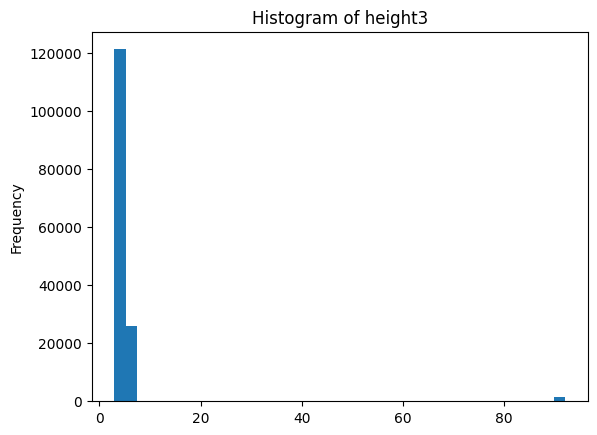

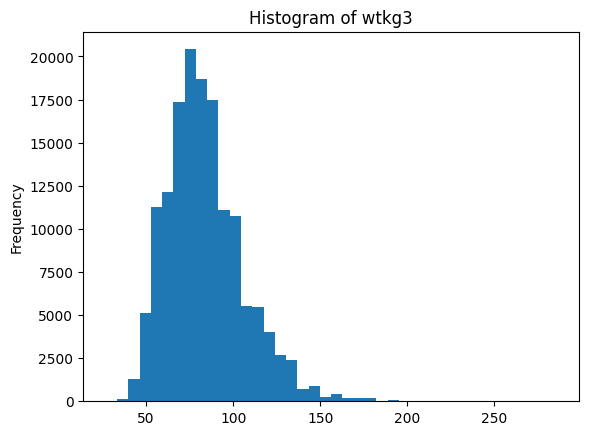

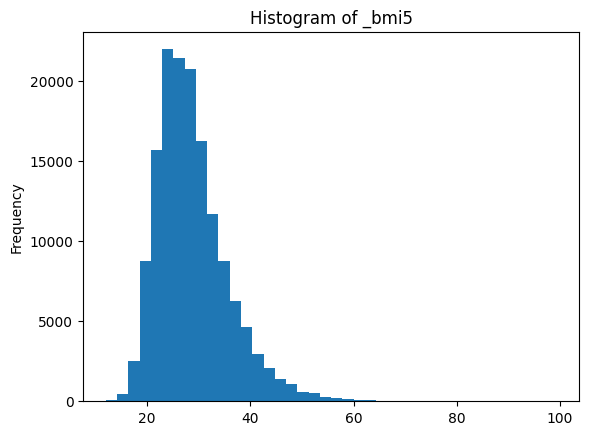

In [141]:
# Plot histogram for these numerical columns
for cols in numerical_columns:
    plt.hist(brfss_df[cols], bins=40)
    plt.title(f"Histogram of {cols}")
    plt.ylabel("Frequency")
    plt.show()

The histograms clearly thow that we have potential outliers for Height column as we see some disconnected values at the far right end of the plot.
We also see that Weight and BMI are right skewed probably due to outliers at higer end values.

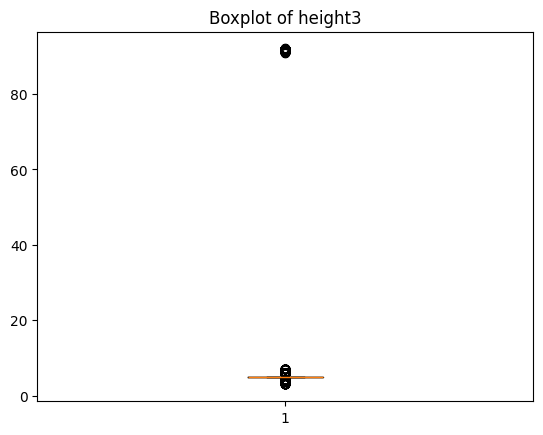

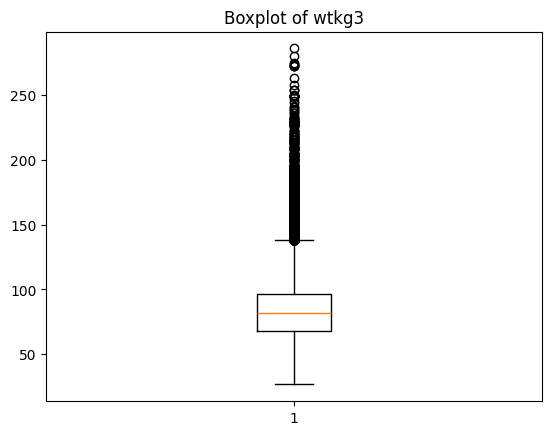

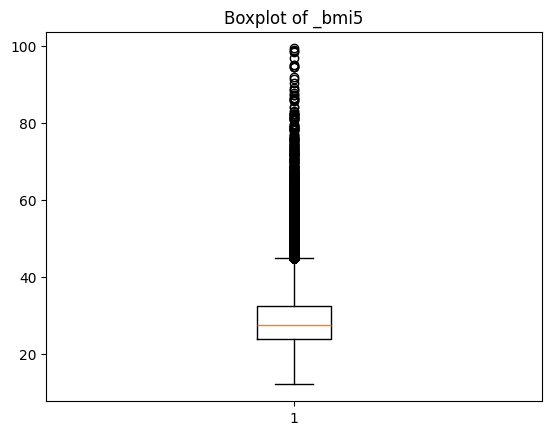

In [142]:
# Lets plot box plot to further check for outliers
for cols in numerical_columns:
    plt.boxplot(brfss_df[cols])
    plt.title(f"Boxplot of {cols}")
    plt.show()

In [143]:
# Drop anything above 9 feet for height as anything above this value is potential outlier
brfss_df = brfss_df[brfss_df["height3"] <= 9]

In [144]:
# Drop anything above  for BMI above 60 as anything above this value is potential outlier
brfss_df = brfss_df[brfss_df["_bmi5"] <= 60]

###### COPD dataset

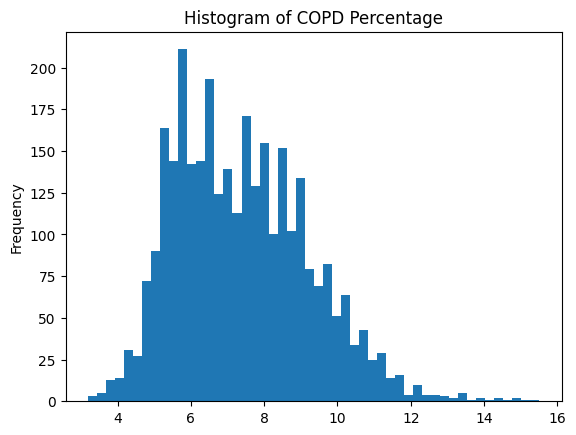

In [145]:
# Plot histogram for percent_copd column
plt.hist(copd_df["percent_copd"], bins=50)
plt.title(f"Histogram of COPD Percentage")
plt.ylabel("Frequency")
plt.show()

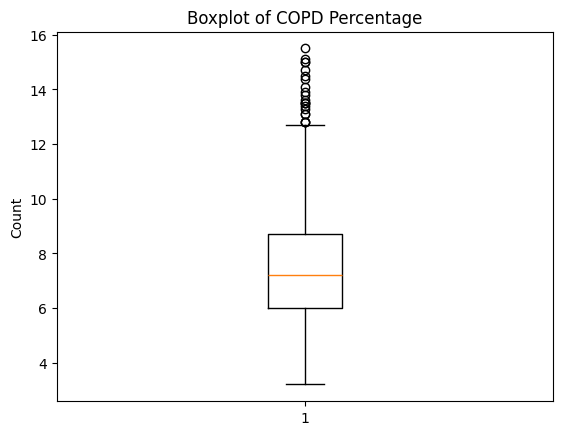

In [146]:
# Plot boxplot for percent_copd column
plt.boxplot(copd_df["percent_copd"])
plt.title(f"Boxplot of COPD Percentage")
plt.ylabel("Count")
plt.show()

In [147]:
# Summary statistics for percent_copd column
copd_df["percent_copd"].describe()

count    3121.000000
mean        7.406216
std         1.835876
min         3.200000
25%         6.000000
50%         7.200000
75%         8.700000
max        15.500000
Name: percent_copd, dtype: float64

From the histogram and box plot we can see that COPD percentage is right skewed and for some couties it is quite high. However these might be valid values as air pollution and repiratory diseases can be higher in some counties. Therefore for this study it does not make sense to drop those high cases.

##### Step 6: Clean categorical columns
Check for invalid categories in categorical columns. 
Missing data or no response from respondents coded as a category 9 in BRFSS dataset. Identify invalid data values and clean the categorical columns.

In [148]:
# Create a list of categorical columns
categorical_columns = [cols for cols in list(brfss_df.columns) if cols not in numerical_columns]

In [149]:
# Check categories and counts for each categorical columns
for cols in categorical_columns:
    print(f"Categries count for {cols} column\n",brfss_df.groupby(cols).count()["height3"], "\n================================")

Categries count for _ltasth1 column
 _ltasth1
1    119356
2     27016
9       657
Name: height3, dtype: int64 
Categries count for _casthm1 column
 _casthm1
1    127348
2     18188
9      1493
Name: height3, dtype: int64 
Categries count for _sex column
 _sex
1    71909
2    75120
Name: height3, dtype: int64 
Categries count for _smoker3 column
 _smoker3
1    15412
2     6729
3    42274
4    77828
9     4786
Name: height3, dtype: int64 
Categries count for _cureci1 column
 _cureci1
1    133230
2      9393
9      4406
Name: height3, dtype: int64 
Categries count for mmsaname column
 mmsaname
Aberdeen, SD, Micropolitan Statistical Area                          553
Akron, OH, Metropolitan Statistical Area                             533
Albany-Schenectady-Troy, NY, Metropolitan Statistical Area          1881
Albuquerque, NM, Metropolitan Statistical Area                      1101
Anchorage, AK, Metropolitan Statistical Area                        1368
                                     

We can see that there is "9" category for some columns. 9 stands for category where repondents didn't repond to question or missing information. 

In [150]:
# Remove rows with value as 9 in categorical columns
for cols in ['_ltasth1', '_casthm1', '_smoker3', '_cureci1']:
    brfss_df = brfss_df[brfss_df[cols] != 9]

##### Step 7: Extract State Code and County Name from column
Both the datasets have State code and County name name fused together in a single column. Perform transformation to extract and separte the State code and County name in separate columns.

###### BRFSS SMART dataset

In [151]:
# Splitting mmsaname column at "," to separate stae and county name
brfss_df["county"] = brfss_df["mmsaname"].apply(lambda x: x.split(",")[0])
brfss_df["state"] = brfss_df["mmsaname"].apply(lambda x: x.split(",")[1])

We see that some County names are combined using '-' in the MMSANAME columns, most probably for smaller counties which are too small in size to be consisered as MMSA.

In [152]:
# Split those combined county names and store as a list
brfss_df["temp_county"] = brfss_df["county"].str.split("-")

In [153]:
# Now as the combined county names is splitted, create separate rows for each values of the county names using explode function
brfss_df = brfss_df.explode("temp_county")
brfss_df["county"] = brfss_df["temp_county"].str.strip()
brfss_df = brfss_df.drop(columns=["temp_county"])

In [154]:
# Check first & last few rows to make sure that the explode worked and now the county names are exploded in separate rows
brfss_df["county"].head(),brfss_df["county"].tail()

(0    Aberdeen
 1    Aberdeen
 2    Aberdeen
 3    Aberdeen
 4    Aberdeen
 Name: county, dtype: object,
 227790        Warren
 227790      Boardman
 227791    Youngstown
 227791        Warren
 227791      Boardman
 Name: county, dtype: object)

In [155]:
brfss_df["state"].head(),brfss_df["state"].tail()

(0     SD
 1     SD
 2     SD
 3     SD
 4     SD
 Name: state, dtype: object,
 227790     OH-PA
 227790     OH-PA
 227791     OH-PA
 227791     OH-PA
 227791     OH-PA
 Name: state, dtype: object)

We see similiar combined State name with `-`. Lets split into separate rows similar to county.

In [156]:
#Split combined state names and store as a list
brfss_df["temp_state"] = brfss_df["state"].str.split("-")

#Now as the combined state names is splitted, create separate rows for each values of the state names using explode function
brfss_df = brfss_df.explode("temp_state")
brfss_df["state"] = brfss_df["temp_state"].str.strip()
brfss_df = brfss_df.drop(columns=["temp_state"])

In [157]:
# Check first & last few rows to make sure that the explode worked and now the state names are exploded in separate rows
brfss_df["state"].head(), brfss_df["state"].tail()

(0    SD
 1    SD
 2    SD
 3    SD
 4    SD
 Name: state, dtype: object,
 227791    PA
 227791    OH
 227791    PA
 227791    OH
 227791    PA
 Name: state, dtype: object)

###### COPD dataset

In [158]:
# Split fullgeoname column at "," to separate state and county name
copd_df["state"] = copd_df["fullgeoname"].apply(lambda x: x.split(",")[0])

In [159]:
copd_df.head()

,fullgeoname,statedesc,county,percent_copd,state
0,"AL, Autauga",Alabama,Autauga,7.5,AL
1,"AL, Baldwin",Alabama,Baldwin,6.9,AL
2,"AL, Barbour",Alabama,Barbour,10.7,AL
3,"AL, Bibb",Alabama,Bibb,9.2,AL
4,"AL, Blount",Alabama,Blount,8.7,AL


##### Step 8: Agrregate BRFSS SMART dataset for summarizing at County level 
We will need to aggregate at county and state level to calculate below summary. This is required because all datasources are at county level and state level as required for this study:

- Asthma Percentage
- Smoker Percentage
- Ecigarrets User Percentage
- Male Percentage
- Female Percentage
- Average Weight
- Average Height
- Average BMI

In [160]:
# This function calculates percentage of reponsdents who ansered yes. yes=2.
def calculate_yes_percentage(data):
    data = data.reset_index()
    total = data.shape[0] #total count
    #filtering rows with 2 i.e ansyered yes and calcutating percentage of such records
    return round(data[data.iloc[:,1] == 2].shape[0]/total*100,2)


In [161]:
# This function calculates percentage of reponsdents who ansered currently or formerly smoker. currently smokes every day=1 ,
# currently smokes some days=2, former smoker=3, never smoked=4
def calculate_smoker_percentage(data):
    data = data.reset_index()
    total = data.shape[0] #total count
    #filtering rows other than 4 i.e never smoked and calcutating percentage of such records
    return round(data[data.iloc[:,1] != 4].shape[0]/total*100,2) 


In [162]:
# These functions calculates percentage of reponsdents who ansered male or female.
# male=1, female=2
def calculate_male_percentage(data):
    data = data.reset_index()
    total = data.shape[0] #total count
    #filtering rows with 1 i.e male and calcutating percentage of such records
    return round(data[data.iloc[:,1] == 1].shape[0]/total*100,2)

def calculate_female_percentage(data):
    data = data.reset_index()
    total = data.shape[0] #total count
    #filtering rows with 2 i.e male and calcutating percentage of such records
    return round(data[data.iloc[:,1] == 2].shape[0]/total*100,2)

In [163]:
# create a copy of "_sex" column to apply a diffrent function for same column
brfss_df["_sex_female"] = brfss_df["_sex"]

In [164]:
# Calculate the percentages and averages as mentioned above using groupby + agg functions
grouped_brfss_df = brfss_df.groupby(["state","county"]).agg({
    "_ltasth1": calculate_yes_percentage,
    "_casthm1": calculate_yes_percentage,
    "_smoker3": calculate_smoker_percentage,
    "_cureci1": calculate_yes_percentage,
    "_sex": calculate_male_percentage,
    "_sex_female": calculate_female_percentage,
    "wtkg3": "mean",
    "height3": "mean",
    "_bmi5": "mean",
})

In [165]:
# Convert multiindex to columns for correct format of table
cleaned_brfss_df = grouped_brfss_df.reset_index()

In [166]:
# Rename BRFSS columns for better redability
cleaned_brfss_df = cleaned_brfss_df.rename(
    columns={
        "_ltasth1": "ever_had_asthma_percentage",
        "_casthm1": "currently_has_asthma_percentage",
        "_smoker3": "smoker_percentage",
        "_cureci1": "ecigarette_user_percentage",
        "_sex": "male_percentage",
        "_sex_female": "female_percentage",
        "wtkg3": "weight",
        "height3": "height",
        "_bmi5": "body_mass_index"
    }
)

In [167]:
# view few rows of the cleaned BRFSS data to be used in further analysis
cleaned_brfss_df.head()

,state,county,ever_had_asthma_percentage,currently_has_asthma_percentage,smoker_percentage,ecigarette_user_percentage,male_percentage,female_percentage,weight,height,body_mass_index
0,AK,Anchorage,17.29,11.63,47.21,6.58,51.64,48.36,85.569166,5.237674,28.913994
1,AL,Birmingham,17.56,10.60,42.19,6.50,42.08,57.92,85.292144,5.195713,29.314641
2,AL,Hoover,17.56,10.60,42.19,6.50,42.08,57.92,85.292144,5.195713,29.314641
3,AL,Mobile,16.78,10.96,46.98,6.26,42.28,57.72,85.836152,5.203647,29.608188
4,AR,Conway,13.22,9.19,47.86,4.28,44.46,55.54,83.457846,5.204521,28.798060


In [168]:
# View few rows of the cleaned copd data to be used in further analysis
copd_df.head()

,fullgeoname,statedesc,county,percent_copd,state
0,"AL, Autauga",Alabama,Autauga,7.5,AL
1,"AL, Baldwin",Alabama,Baldwin,6.9,AL
2,"AL, Barbour",Alabama,Barbour,10.7,AL
3,"AL, Bibb",Alabama,Bibb,9.2,AL
4,"AL, Blount",Alabama,Blount,8.7,AL


In [169]:
#store BRFSS and copd dataframes as csv files for further use

xref_df = pd.read_csv("./datasets/state_code_reference.csv") #use state code cross reference to assign state names before storing 
cleaned_brfss_df = cleaned_brfss_df.merge(xref_df,how="inner",left_on="state",right_on="state_code",suffixes=('_brfss', '_xref'))
copd_df = copd_df.merge(xref_df,how="inner",left_on="state",right_on="state_code",suffixes=('_copd', '_xref'))

cleaned_brfss_df.to_csv("./datasets/brfss_asthma.csv", index=False)
copd_df.to_csv("./datasets/copd.csv", index=False)

#### Ethical Implications

The BRFSS SMART and COPD prevalence datasets do not contain personally identifiable data, and there is no risk of data privacy breaches. These open datasets are freely available for use and redistribution without restrictions. These datasets do not contain any licensed data or copyrighted data. The COPD dataset contains estimated COPD prevalence, which may deviate from the actual COPD prevalence, and may not be an exact representation of the population. As part of data wrangling, records in the BRFSS SMART dataset where respondents didn't provide responses or missing data have been dropped. For some records in the source BRFSS SMART dataset, the county and state of the respondents are combined into one record. As part of data wrangling,  such records were split into multiple records with the assumption that the and the records are combined because the respondent's location does not belong to a single county. This approach and assumption may not be an actual case, and splitting the records in this approach may introduce bias. Records in the BRFSS SMART dataset are aggregated at the county and state levels to calculate the prevalence percentages and averages. These prevalence percentages and averages may not represent the population because not all residents participated in the survey, and information that was missing was dropped for this study. Furthermore, some records have been dropped as part of outliers removal which may also remove other associated data that might have otherwise impacted or changed the findings of this study. Hence, the tarnsformed datasets after applying the above data wrangling steps may not be an actual representation of the population and the outcomes of this study should be used with this awareness and diligence.

### Cleaning/Formatting Website Data

##### Step1: Parse Website HTML data to retrive state urls for county statistics

The main website page contains links to each state level pages which contains county statistics data needed for this study. We need to parse html from country wikipedia page to retrieve the state level urls further use. 

In [1]:
# import required package
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

In [2]:
# HTTP Get request using request package to retrive webpage (url "https://en.wikipedia.org/wiki/County_statistics_of_the_United_States")

try:
    response = requests.get("https://en.wikipedia.org/wiki/County_statistics_of_the_United_States")
except Exception as err:
    print(f"Exceptions encountered in HTTP get request: {err}")
else:    
    if response.status_code == 200:
        print("Webpage data read successfully")
        html_data = response.text
    else:
        print(f"Error encountered: {response.reason}")

Webpage data read successfully


In [3]:
# Create a soup object from retrieved html
soup = BeautifulSoup(html_data, "html.parser")

In [4]:
# Find table using class attribute to locate the needed table from html page
tables = soup.find_all("table", {"class":"wikitable sortable"})

In [5]:
# we need the first table from this html. The required data is in <tr> tag of table body <tbody>
# use find_all to get a list of all table rows from the table body
table_rows = tables[0].tbody.find_all("tr")

# Exclude the first table row as its the header row
table_rows = table_rows[1:]

In [6]:
# Retrive state name and state state page level urls from href attribute of <a> tag in each table row
hrefs = [each_row.a.get("href").strip() for each_row in table_rows]
state_names = [each_row.find("a").get("title").strip().lower() for each_row in table_rows]

In [7]:
# View few retriebed href and state names
print(f"href: {hrefs[0:5]}")
print(f"state name: {state_names[0:5]}")

href: ['/wiki/Texas', '/wiki/Georgia_(U.S._state)', '/wiki/Virginia', '/wiki/Kentucky', '/wiki/Missouri']
state name: ['texas', 'georgia (u.s. state)', 'virginia', 'kentucky', 'missouri']


In [8]:
# Transform state name to lower case and remove extra charcters
states = []
for ref in state_names:
    prog = re.compile("([a-z]+\s*)+")
    name = prog.match(ref).group().strip().replace(" ","_")
    states.append(name)

In [9]:
# Convert href links to a proper wikipedia url
urls = []
for ref in hrefs:
    prog = re.compile("^/wiki/([a-zA-Z]+_?[a-zA-Z]+)|^/wiki/([a-zA-Z]+)")
    suffix = prog.match(ref).group(1)
    urls.append(f"https://en.wikipedia.org/wiki/list_of_counties_in_{suffix}")

In [10]:
# Create state name and url dataframe
state_url_df = pd.DataFrame(data={
    "state":states,
    "state_county_stat_url":urls
})

In [11]:
# View few rows of the dataframe
state_url_df.head()

,state,state_county_stat_url
0,texas,https://en.wikipedia.org/wiki/list_of_counties...
1,georgia,https://en.wikipedia.org/wiki/list_of_counties...
2,virginia,https://en.wikipedia.org/wiki/list_of_counties...
3,kentucky,https://en.wikipedia.org/wiki/list_of_counties...
4,missouri,https://en.wikipedia.org/wiki/list_of_counties...


##### Step2: Parse HTML from state level urls to create a redabale county statistics dataframe

The  state level urls are separate wikipedia pages. We need to parse each of these html pages to retrieve the needed statistics (population, area, county seat, etc.) for each counties within the state.

In [12]:
# This function uses pandas read_html to read tables from the state level wikipedia pages

def locate_correct_table(state, url):
    data_found = False
    return_df = None
    state_data = pd.read_html(url)
    for i in range(len(state_data)):
        for cols in list(state_data[i].columns):
            if str(cols).lower() == "county": #retrieve table only if county column is present
                if len(state_data[i].index)> 0:
                    df = state_data[i]
                    df["state"] = state
                    return_df = df
                    data_found = True
                    break
    return data_found, return_df

In [13]:
# Use state urls for each state in the dataframe created in Step 1 to retrieve the county statistics table using above user defined function.
# each state county stats is stored as a dict where `state name` is the key and `county statistics dataframe` for that state is the value
county_df_list = dict()
for idx in state_url_df.index:
    state = state_url_df["state"][idx]
    try:
        flag, state_df = locate_correct_table(state,state_url_df["state_county_stat_url"][idx])
    except Exception as err:
        if "404" in err.__str__().lower():
            print(f"This state {state} does not have a county list, please ignore")
        else:
            raise
    else:
        if flag:
            print(f"county stats data retrived from Wikipedia for {state}")
            county_df_list[state] = state_df
        

county stats data retrived from Wikipedia for texas
county stats data retrived from Wikipedia for georgia
county stats data retrived from Wikipedia for virginia
county stats data retrived from Wikipedia for kentucky
county stats data retrived from Wikipedia for missouri
county stats data retrived from Wikipedia for kansas
county stats data retrived from Wikipedia for illinois
county stats data retrived from Wikipedia for north_carolina
county stats data retrived from Wikipedia for iowa
county stats data retrived from Wikipedia for tennessee
county stats data retrived from Wikipedia for nebraska
county stats data retrived from Wikipedia for indiana
county stats data retrived from Wikipedia for ohio
county stats data retrived from Wikipedia for minnesota
county stats data retrived from Wikipedia for michigan
county stats data retrived from Wikipedia for mississippi
county stats data retrived from Wikipedia for oklahoma
county stats data retrived from Wikipedia for arkansas
county stats d

In [14]:
# Check if the dict is created successfully and has value for a state, say connecticut, to make sure the data is retrived & stored properly
county_df_list["connecticut"].head()

,County,FIPS code[10],Seat[b][12],Est.[12],Origin[1],Etymology[13],Population[14],Area[12],Map,state
0,Fairfield County,1,Bridgeport,1666,original county,From the hundreds of acres of salt marsh that ...,959768,"626 sq mi (1,621 km2)",NaN,connecticut
1,Hartford County,3,Hartford,1666,original county,"After Hertford, England (still said Hartford)",896854,"736 sq mi (1,906 km2)",NaN,connecticut
2,Litchfield County,5,Litchfield,1751,"From parts of Fairfield, Hartford and New Have...","City of Lichfield, Staffordshire, England",185000,"920 sq mi (2,383 km2)",NaN,connecticut
3,Middlesex County,7,Middletown,1785,From parts of Hartford and New London Counties,"Former county of Middlesex, England",164759,369 sq mi (956 km2),NaN,connecticut
4,New Haven County,9,New Haven,1666,original county,"After New Haven Colony, founded as a haven in ...",863700,"606 sq mi (1,570 km2)",NaN,connecticut


#### Step 3: Clean headers and convert to lower case without numbers

The headers of the county statistics table retrieved from state wikipedia webpages have blanks, numbers and special characters. We need to clean the headers to remove blanks, special charcters and convert to lower case for consistency. It will be easier and convinient to use and join tables with column names having same convention. 

In [15]:
# This functions takes a dataframe as input and cleans the headers to convert to lower case, replace blanks with underscore. 
# Returns a dict of old header name as key and cleaned header name as value

def clean_headers(df):
    header_dict = dict()
    for header in df.columns:
        # print(header)
        prog = re.compile("([a-z]+\s*)+|[@#]+")
        try:
            name = prog.match(header.lower()).group().strip().replace(" ","_")
        except AttributeError:
            print("Column name does not contain valid header, ignore")
        else:
            header_dict[header] = name
    df = df.rename(columns=header_dict)
    # return header_dict
    return df

#### Step 4: Create a subset of only required columns from the website data

The county statistics from state level web page has multiple columns. Create a subset of the data to keep only the needed columns.

In [16]:
# List of needed columns
col_list = ["county","county_seat","fips_code","population","area","state"]

In [17]:
# This function extract only needed columns. Population is a mandatory column for our study.
def create_df_subset(df, col_list):
    return_df = None
    population_data_present = False
    if "population" in df.columns:
        keep_cols = []
        for cols in col_list:
            if cols in df.columns:
                keep_cols.append(cols)
            else:
                print(f"column {cols} not present in dataframe")
        if keep_cols:
            return_df = df[keep_cols]
            population_data_present = True
        else:
            print(f"No matching columns in dataframe")
    return population_data_present, return_df

In [18]:
# Apply the transforms mentioned in Step 3 and Step 4 to each state and return as list of dataframes representing each state 

cleaned_df_list = []
for state, each_df in county_df_list.items():   
    # Apply step 3 transforms
    cleaned_header_df = clean_headers(each_df)
    # Apply step 4 transforms
    success_flag, subset_df = create_df_subset(cleaned_header_df, col_list)
    if success_flag:
        cleaned_df_list.append(subset_df)

column area not present in dataframe
column county_seat not present in dataframe
column county_seat not present in dataframe
column county_seat not present in dataframe
column county_seat not present in dataframe


#### Step 5 : Concat each state county statistics to a single dataframe

At this point we have all counties for each state separately stored in seprate dataframes. We need to concat these dataframes to form a single dataframe for further use.

In [19]:
#concat
concated_df = pd.DataFrame(columns=["county","county_seat","fips_code","population","area","state"])
for each_df in cleaned_df_list:
    concated_df = pd.concat([concated_df,each_df], ignore_index=True)

In [20]:
# view few rows of the concated data
concated_df.head()

,county,county_seat,fips_code,population,area,state
0,Anderson County,Palestine,1,58064,"1,071 sq mi (2,774 km2)",texas
1,Andrews County,Andrews,3,18334,"1,501 sq mi (3,888 km2)",texas
2,Angelina County,Lufkin,5,87101,"802 sq mi (2,077 km2)",texas
3,Aransas County,Rockport,7,24944,252 sq mi (653 km2),texas
4,Archer County,Archer City,9,8835,"910 sq mi (2,357 km2)",texas


#### Step 6 : Convert county names, county_seat to lowercase and clean county names

County names are stored with the word 'County' along with its name. Lets remove the County word and keep only county name as this will cause problems when joining on county with other datasets. Also, it is better to convert and store string values in lower case for consistency. We can always convert to different case when showing in visualizations.

In [21]:
# converting to lower case
concated_df["county"] = concated_df["county"].str.lower()
concated_df["county_seat"] = concated_df["county_seat"].str.lower()

In [22]:
# Remove `county` word from county name
concated_df["county"] = concated_df["county"].str.replace(" county", "")

In [23]:
# view few rows after transformation
concated_df.head()

,county,county_seat,fips_code,population,area,state
0,anderson,palestine,1,58064,"1,071 sq mi (2,774 km2)",texas
1,andrews,andrews,3,18334,"1,501 sq mi (3,888 km2)",texas
2,angelina,lufkin,5,87101,"802 sq mi (2,077 km2)",texas
3,aransas,rockport,7,24944,252 sq mi (653 km2),texas
4,archer,archer city,9,8835,"910 sq mi (2,357 km2)",texas


#### Step 7 : Clean Area column to keep values only in square miles

Area column has county area value both in square miles and square kms. Lets keep only square miles value in numerical format in this column.

In [24]:
# This function takes the string in area column and cleans it to return the square miles as a number
# e.g. 1,071 sq mi (2,774 km2) >> 1071

def clean_area(area_str):
    area = area_str
    prog = re.compile(r"([0-9,]+)\s*")
    if area_str:
        if isinstance(area_str,str):
            try:
                area = prog.match(area_str).group(1)
                area = int(area.replace(",",""))
            except AttributeError:
                area = None
    return area
        

In [25]:
# clean area column using the user defined function
concated_df["area_mod"] = concated_df["area"].apply(clean_area)
concated_df["area"] = concated_df["area_mod"]
concated_df = concated_df.drop(columns=["area_mod"])

In [26]:
# View few rows
concated_df.head()

,county,county_seat,fips_code,population,area,state
0,anderson,palestine,1,58064,1071.0,texas
1,andrews,andrews,3,18334,1501.0,texas
2,angelina,lufkin,5,87101,802.0,texas
3,aransas,rockport,7,24944,252.0,texas
4,archer,archer city,9,8835,910.0,texas


#### Step 8 : Fill missing values and remove duplicates.

Check for presence of missing data and duplicates. Lets fill missing values and drop duplicate rows as those will skew the findings.

In [27]:
concated_df.isna().sum()

county          0
county_seat    46
fips_code       0
population      0
area           39
state           0
dtype: int64

We see that `county_seat` column has 46 nulls, lets check few rows with such nulls. 

In [28]:
concated_df[concated_df["county_seat"].isna()].head()

,county,county_seat,fips_code,population,area,state
1820,oglala lakota,NaN,102,13519,2094.0,south_dakota
1829,todd,NaN,121,9220,1388.0,south_dakota
2292,androscoggin,NaN,1,113023,497.0,maine
2293,aroostook,NaN,3,67255,6829.0,maine
2294,cumberland,NaN,5,307451,1217.0,maine


In [29]:
# Most likely there is no separate county seat name for these counties where the county_seat is missing. 
# Therefore, we can fill the county_seat with county name
concated_df["county_seat"] = concated_df["county_seat"].fillna(concated_df["county"])

We see from above that `area` column has 39 nulls, lets check few rows with such nulls. 

In [30]:
# Lets check which state has the county area has null
concated_df[concated_df["area"].isna()].groupby("state").count()["county"]

state
washington    39
Name: county, dtype: int64

We see that `area` column nulls are for `Washington` state. 

In [31]:
# Lets fill the Nulls in the `area` column with average value.
county_area_mean_WA = concated_df["area"].mean(skipna=True)
concated_df["area"] = concated_df["area"].fillna(county_area_mean_WA)

In [32]:
# Lets check that there are no more nulls in the dataframe
concated_df.isna().sum()

county         0
county_seat    0
fips_code      0
population     0
area           0
state          0
dtype: int64

In [33]:
# Lets check if we have duplicate rows
concated_df.duplicated(subset=["county","state"]).sum()

0

We do not see any duplicate rows for a `state` and `county` keys combination.

In [34]:
# View few rows of the cleaned website data that will be used for further analysis
concated_df.head()

,county,county_seat,fips_code,population,area,state
0,anderson,palestine,1,58064,1071.0,texas
1,andrews,andrews,3,18334,1501.0,texas
2,angelina,lufkin,5,87101,802.0,texas
3,aransas,rockport,7,24944,252.0,texas
4,archer,archer city,9,8835,910.0,texas


In [35]:
# As multiple website pages were parsed to create the cleaned website data, it is better store it locally as csv as a backup.
concated_df.to_csv("./datasets/county_stats.csv",index=False)

#### Ethical Implications

The Wikipedia website pages used for this study do not contain personally identifiable data, and there is no risk of data privacy breaches. Wikipedia grants permission to use and distribute the content under [_Creative Commons Attribution-ShareAlike 4.0 International License_][1] and, unless otherwise noted, the [_GNU Free Documentation License_][2] (Wikipedia, n.d.). Some counties do not have _conty seat name_ available in the website data. It is assumed that county names for such counties are the same as the county seat names; hence, no separate county seat name is available, which might not be a valid assumption. The nulls in _county area_ for Washington state are filled with the average value, which might not accurately represent the actual county area for those counties. Hence, after applying the above data wrangling steps, the transformed datasets may not represent the population, and the outcomes of this study should be used with this awareness and diligence.

[1]: https://en.wikipedia.org/wiki/Wikipedia:Text_of_the_Creative_Commons_Attribution-ShareAlike_4.0_International_License)
[2]: https://en.wikipedia.org/wiki/Wikipedia:Text_of_the_GNU_Free_Documentation_License)

### Connecting to an API/Pulling in the Data and Cleaning/Formatting

#### Step 1: Retrive latitude and Longitude of the county seat town for ecah counties

Use _geolocation api_ to retrieve the latitude and longitude of county seat town. We need latitude and Longitude to retrive the air pollution data in further steps.

In [1]:
# import modules

import requests
import pandas as pd
import json
import numpy as np
import time

In [2]:
# This function provides api key for api call

def get_api_keys():
    with open("open_weather_apikey.json", "r") as json_file:
        data = json.load(json_file)
        return data["apikey"]
    

In [3]:
# This function perform geolocation api call
def geolocation_api_call(city, state, api_key):
    query_params = {
        "appid": api_key,
        "q": f"{city},{state},US",
        "limit": 1
    }

    response = requests.get("http://api.openweathermap.org/geo/1.0/direct", params=query_params)
    return response.json()


In [4]:
# This function iterates through all counties for a state to retrieve latitude and longitude of the county seat town. 
# There is a added delay of 1.5 min every 50 counties to stay within api rate limit
def retrive_geolocation(df, state, delay=90):
    api_key = get_api_keys()
    latitudes = []
    longitudes = []
    i = 0
    for idx, row in df[["county_seat","state"]].iterrows():
        county_seat = row["county_seat"]
        state = row["state"]
        try:
            data = geolocation_api_call(county_seat, state, api_key)
        except Exception as e:
            print(f"Geocoding exception occured for county {county_seat}, state {state}")
            pass
        else:
            if len(data) > 0:
                try:
                    latitude = data[0]["lat"]
                    longtitude = data[0]["lon"]
                    resp_state = data[0]["state"]
                except KeyError:
                    print(f"Geocoding failed for county {county_seat}, state {state}")
                    latitude = np.nan
                    longtitude = np.nan
            else:
                print(f"Geocoding did not return a match for county {county_seat}, state {state}")
                latitude = np.nan
                longtitude = np.nan
            latitudes.append(latitude)
            longitudes.append(longtitude)
        i += 1
        if i == 50:
            print("Delaying to not exceed api rate limit")
            time.sleep(delay)
            i = 0
    return_df = df.copy()
    return_df["lat"] = latitudes
    return_df["lon"] = longitudes
    return return_df

In [5]:
# The website data for county statistics is retrievd and stored as CSV in Milestone 3. lets read the data into a dataframe
website_df = pd.read_csv("./datasets/county_stats.csv")

In [6]:
# Create a unique list of states from the county statistics dataset
state_list = website_df["state"].unique()

# Numbers of states 
len(state_list)

38

We se that there are 38 states. Lets call the _geocoding api_ for 5 states at a time to not reach the api limit. Store the geolocation data retrived from api in a csv file so that we do not need to repeat api call, incase we need to reload the data as there is monthly limit for the api.

In [7]:
# Function to retrive geolocation of county seat town for a list of states and then store it in csv file for further use
def geo_location_batches(state_list):
    for state in state_list:
        state_subset_df = website_df[website_df["state"] == state]
        geo_df = retrive_geolocation(state_subset_df, state)
        geo_df.to_csv(f"./datasets/geolocation/geolocation_{state}.csv", index=False)

Run geolocation of county seat town - 15 states as a time

In [8]:
geo_location_batches(state_list[0:15])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Geocoding did not return a match for county appling (de jure) and evans (de facto), state georgia
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Geocoding did not return a match for county alexandria and newport, state kentucky
Delaying to not exceed api rate limit
Geocoding did not return a match for county covington and independence, state kentucky
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Geocoding did not return a match for county ste. genevieve, state missouri
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Geocoding did not return a match for county fort 

In [9]:
geo_location_batches(state_list[15:30])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Geocoding did not return a match for county oglala lakota, state south_dakota
Geocoding did not return a match for county todd, state south_dakota
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Geocoding did not return a match for county (independent city), state nevada


In [10]:
geo_location_batches(state_list[30:])

Geocoding did not return a match for county aroostook, state maine
Geocoding did not return a match for county piscataquis, state maine
Geocoding did not return a match for county sagadahoc, state maine
Geocoding did not return a match for county caledonia, state vermont
Geocoding did not return a match for county lamoille, state vermont
Geocoding did not return a match for county manchester and nashua, state new_hampshire
Geocoding did not return a match for county middlesex, state connecticut


#### Step 2: Combine the induvidual state csv files created after latitude/longitude retrival

In above step 1, geolocation of county seat towns for each state is stored as separate csv files. We need to combine these separate csv files into a single dataframe.

In [8]:
# combine the induvidual state csvs created after latitude/longitude retrival into a single dataframe
df_geo_combined = pd.read_csv(f"./datasets/geolocation/geolocation_{state_list[0]}.csv")
for state in state_list[1:]:
    df_geo_combined = pd.concat([df_geo_combined,pd.read_csv(f"./datasets/geolocation/geolocation_{state}.csv")])

In [9]:
# view few rows of geolocation df
df_geo_combined.head()

,county,county_seat,fips_code,population,area,state,lat,lon
0,anderson,palestine,1,58064,1071.0,texas,31.762115,-95.630789
1,andrews,andrews,3,18334,1501.0,texas,32.318716,-102.545715
2,angelina,lufkin,5,87101,802.0,texas,31.338624,-94.728856
3,aransas,rockport,7,24944,252.0,texas,28.020573,-97.054434
4,archer,archer city,9,8835,910.0,texas,33.595659,-98.625613


In [10]:
# check number of states to make sure we have all rows after combining each state csvs
df_geo_combined["state"].nunique()

38

#### Step 3: Find and drop missing values for latitiude and longitude
We need to identify nulls in latitude and longitude column and drop those records as there was no geolocation found using Geocoding API for these rows and without geolocation we will not be able to retrive air pollution data.

In [11]:
# Check for nulls
df_geo_combined.isna().sum()

county          0
county_seat     0
fips_code       0
population      0
area            0
state           0
lat            17
lon            17
dtype: int64

In [12]:
# dataframe size before dropping null
df_geo_combined.shape

(2368, 8)

In [13]:
# Drop nulls
df_geo_combined = df_geo_combined.dropna()

In [14]:
# check size of dataset
df_geo_combined.shape

(2351, 8)

#### Step 4: Retrive air pollution data of county seat town for each counties and state using _air pollution_ api

Use latitude and Longitude to retrive the air pollution data for the county seat town of all counties.

In [15]:
# This function performs air pollution api call
def air_pollution_api_call(state, latitude, longitude, api_key):
    query_params = {
        "appid": api_key,
        "lat": latitude,
        "lon": longitude
    }
    response = requests.get("http://api.openweathermap.org/data/2.5/air_pollution?", params=query_params)
    return response.json()

In [16]:
# This function iterates through all counties for a state to retrieve air pollution of the county seat town using latitude and longitude. 
# There is a delay of 1.5 min every 50 counties
def retrive_air_pollution_info(df, state, delay=90):
    api_key = get_api_keys()
    aqi_list = []
    co_list = []
    no_list = []
    no2_list = []
    so2_list = []
    o3_list = []
    pm2_5_list = []
    pm10_list = []
    nh3_list = []
    i = 0
    for idx, row in df[["lat","lon","county_seat","state"]].iterrows():
        latitude = row["lat"]
        longitude = row["lon"]
        county_seat = row["county_seat"]
        state = row["state"]
        try:
            data = air_pollution_api_call(state, latitude, longitude, api_key)
        except Exception as e:
            print(f"{e}, Air pollution api exception occured for county {county_seat}, state {state}")
            aqi = np.nan
            co = np.nan
            no = np.nan
            no2 = np.nan
            so2 = np.nan
            o3 = np.nan
            pm2_5 = np.nan
            pm10 = np.nan
            nh3 = np.nan
        else:
            try:
                aqi = data["list"][0]["main"]["aqi"]
            except (KeyError, IndexError):
                aqi = np.nan
            try:
                co = data["list"][0]["components"]["co"]
            except (KeyError, IndexError):
                co = np.nan
            try:
                no = data["list"][0]["components"]["no"]
            except (KeyError, IndexError):
                no = np.nan
            try:
                no2 = data["list"][0]["components"]["no2"]
            except (KeyError, IndexError):    
                no2 = np.nan
            try:
                so2 = data["list"][0]["components"]["so2"]
            except (KeyError, IndexError):   
                so2 = np.nan
            try:
                o3 = data["list"][0]["components"]["o3"]
            except (KeyError, IndexError):
                o3 = np.nan
            try:
                pm2_5 = data["list"][0]["components"]["pm2_5"]
            except (KeyError, IndexError):
                pm2_5 = np.nan
            try:
                pm10 = data["list"][0]["components"]["pm10"]
            except (KeyError, IndexError):
                pm10 = np.nan
            try:
                nh3 = data["list"][0]["components"]["nh3"]
            except (KeyError, IndexError):
                nh3 = np.nan

            aqi_list.append(aqi)
            co_list.append(co)
            no_list.append(no)
            no2_list.append(no2)
            so2_list.append(so2)
            o3_list.append(o3)
            pm2_5_list.append(pm2_5)
            pm10_list.append(pm10)
            nh3_list.append(nh3)
        i += 1
        if i == 50:
            print("Delaying to not exceed api rate limit")
            time.sleep(delay)
            i = 0
    return_df = df.copy()
    return_df["aqi"] = aqi_list
    return_df["co"] = co_list
    return_df["no"] = no_list
    return_df["no2"] = no2_list
    return_df["so2"] = so2_list
    return_df["o3"] = o3_list
    return_df["pm2_5"] = pm2_5_list
    return_df["pm10"] = pm10_list
    return_df["nh3"] = nh3_list
    return return_df

In [17]:
# Function to retrive air pollution of county seat town for a list of states and then store it in csv file for further use
def polution_api_batches(state_list):
    for state in state_list:
        state_subset_df = df_geo_combined[df_geo_combined["state"] == state]
        pollution_df = retrive_air_pollution_info(state_subset_df, state)
        pollution_df.to_csv(f"./datasets/airpollution/air_pollution_{state}.csv", index=False)

Perform air pollution api call for 5 states at a time.

In [17]:
polution_api_batches(state_list[0:5])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit


In [18]:
polution_api_batches(state_list[5:10])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit


In [19]:
polution_api_batches(state_list[10:15])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit


In [20]:
polution_api_batches(state_list[15:20])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit


In [21]:
polution_api_batches(state_list[20:25])

Delaying to not exceed api rate limit
Delaying to not exceed api rate limit
Delaying to not exceed api rate limit


In [22]:
polution_api_batches(state_list[25:30])

In [23]:
polution_api_batches(state_list[30:35])

In [24]:
polution_api_batches(state_list[35:])

#### Step 4: Combine the induvidual state csv files created after air polllution retrival
In above step 1, air pollution of county seat towns for each state is stored as separate csv files. We need to combine these separate csv files into a single dataframe.

In [18]:
# combine the induvidul csvs into a single dataframe
df_pollution_combined = pd.read_csv(f"./datasets/airpollution/air_pollution_{state_list[0]}.csv")
for state in state_list[1:]:
    df_pollution_combined = pd.concat([df_pollution_combined,pd.read_csv(f"./datasets/airpollution/air_pollution_{state}.csv")])

In [19]:
# view few rows
df_pollution_combined.head()

,county,county_seat,fips_code,population,area,state,lat,lon,aqi,co,no,no2,so2,o3,pm2_5,pm10,nh3
0,anderson,palestine,1,58064,1071.0,texas,31.762115,-95.630789,1,297.07,0.00,6.26,0.86,54.36,7.98,9.07,3.64
1,andrews,andrews,3,18334,1501.0,texas,32.318716,-102.545715,2,243.66,0.01,2.36,0.28,77.25,3.26,8.14,2.53
2,angelina,lufkin,5,87101,802.0,texas,31.338624,-94.728856,1,330.45,0.00,13.20,0.58,56.51,7.82,10.20,12.54
3,aransas,rockport,7,24944,252.0,texas,28.020573,-97.054434,3,247.00,0.00,0.73,0.81,104.43,3.07,3.69,1.47
4,archer,archer city,9,8835,910.0,texas,33.595659,-98.625613,2,257.02,0.00,2.36,0.07,82.25,3.27,6.40,3.10


#### Step 5: Find and drop missing values for air pollution

We need to identify nulls in air pollution columns and drop those records as there was no air pollution found using Air Pollution API for these rows and without geolocation we will not be ale to retrive air pollution data.

In [20]:
# Check for nulls
df_pollution_combined.isna().sum()

county         0
county_seat    0
fips_code      0
population     0
area           0
state          0
lat            0
lon            0
aqi            0
co             0
no             0
no2            0
so2            0
o3             0
pm2_5          0
pm10           0
nh3            0
dtype: int64

We do not see any nulls

#### Step 6: Subset required columns and store air pollution dataset

Create a subset of only required columns needed for air poluution and store data in csv file.

In [22]:
# create subset dataframe with required columns
df_pollution_combined = df_pollution_combined[['county', 'county_seat', 'state',
       'lat', 'lon', 'aqi', 'co', 'no', 'no2', 'so2', 'o3', 'pm2_5', 'pm10',
       'nh3']]

In [23]:
# view few rows of the air pollution dataframe
df_pollution_combined.head()

,county,county_seat,state,lat,lon,aqi,co,no,no2,so2,o3,pm2_5,pm10,nh3
0,anderson,palestine,texas,31.762115,-95.630789,1,297.07,0.00,6.26,0.86,54.36,7.98,9.07,3.64
1,andrews,andrews,texas,32.318716,-102.545715,2,243.66,0.01,2.36,0.28,77.25,3.26,8.14,2.53
2,angelina,lufkin,texas,31.338624,-94.728856,1,330.45,0.00,13.20,0.58,56.51,7.82,10.20,12.54
3,aransas,rockport,texas,28.020573,-97.054434,3,247.00,0.00,0.73,0.81,104.43,3.07,3.69,1.47
4,archer,archer city,texas,33.595659,-98.625613,2,257.02,0.00,2.36,0.07,82.25,3.27,6.40,3.10


In [24]:
df_pollution_combined.to_csv(f"./datasets/air_pollution_full.csv", index=False)

#### Ethical Implications

The openweather api used for this study does not contain personally identifiable data, and there is no risk of data privacy breaches. This study is using a free pricing plan _api key_ for opennweather api access. [Free plan][1] has a rate limit per second and month. The api calls must adhere to this rate limit to not overwhelm the openweather servers. 

It has been assumed that the air pollution of a _county seat town_ is a good representation of air pollution in the entire county, which may not represent the air pollution for all areas of a county. Air pollution may vary for different locations within a county, particularly counties with vast areas. Geolocation for some counties were not found and those counties were dropped from the dataset. Hence, the transformed air pollution dataset may not accurately represent all areas within a county, and the outcomes of this study should be used with this awareness and diligence.

[1]: https://openweathermap.org/price

### Merging the Data and Storing in a Database/Visualizing Data

In [1]:
# import modules

import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import csv

#### Store curated data sources as tables in SQLite Database

In [2]:
# create a sqlite connection
conn = sqlite3.connect("air_pollution_db.sqlite3")
# get a cursor 
cur = conn.cursor()

In [3]:
# Create COPD table for flat file source
sqlstmt = """CREATE TABLE copd (
fullgeoname TEXT,
statedesc TEXT,
county TEXT,
percent_copd REAL,
state_copd TEXT,
state_code TEXT,
state_xref TEXT,
PRIMARY KEY(county,state_xref)
)
"""
cur.execute(sqlstmt)
#commit to DB
conn.commit()

In [4]:
# Create county_stats table for flat website(html) source
sqlstmt = """CREATE TABLE county_stats (
county TEXT,
county_seat TEXT,
fips_code INTEGER,
population INTEGER,
area REAL,
state TEXT,
PRIMARY KEY(county,state)
)"""
cur.execute(sqlstmt)
#commit to DB
conn.commit() 

In [5]:
# Create air_pollution table for api source
sqlstmt = """CREATE TABLE air_pollution (
county TEXT,
county_seat TEXT,
state TEXT,
lat REAL,
lon REAL,
aqi INTEGER,
co REAL,
no REAL,
no2 REAL,
so2 REAL,
o3 REAL,
pm2_5 REAL,
pm10 REAL,
nh3 REAL,
PRIMARY KEY(county,state)
)
"""
cur.execute(sqlstmt)
#commit to DB
conn.commit()

In [6]:
# Create asthma table for flat file source
sqlstmt = """CREATE TABLE asthma (
state_brfss TEXT,
county TEXT,
ever_had_asthma_percentage REAL,
currently_has_asthma_percentage REAL,
smoker_percentage REAL,
ecigarette_user_percentage REAL,
male_percentage REAL,
female_percentage REAL,
weight REAL,
height REAL,
body_mass_index REAL,
state_code TEXT,
state_xref TEXT,
PRIMARY KEY(county,state_xref)
)
"""
cur.execute(sqlstmt)
#commit to DB
conn.commit()

In [7]:
# close cursor
cur.close()

In [8]:
# this function insert data to sqlite table from csv file
def insert_data_in_sql_table_from_csv(db_conn, table_name, csv_filepath, numcols):
    cur = db_conn.cursor()
    values = ",".join(["?" for _ in range(numcols)])
    with open(csv_filepath) as csvfile:
        csv_reader = csv.reader(csvfile)
        sqlstmt = f"""INSERT INTO {table_name} VALUES({values})"""
        try:
            print(f"Executing sql statement \n{sqlstmt}")
            cur.executemany(sqlstmt, csv_reader)
            
        except Exception as err:
            print(f"Error encounterted while inserting data to table, {err}\n"
                 f"Rollback initiated")
            db_conn.rollback()
            return False
    cur.close()
    return True


In [9]:
# read the copd dataset created from from flat files in milestone 2 and load data in sql table
success = insert_data_in_sql_table_from_csv(conn, "copd", "./datasets/copd.csv", 7)
if success:
    print(f"Table copd loaded successfully from csv file")
    conn.commit()

Executing sql statement 
INSERT INTO copd VALUES(?,?,?,?,?,?,?)
Table copd loaded successfully from csv file


In [10]:
# read the county statistics dataset created from scraping website in milestone 3 and load data in sql table
success = insert_data_in_sql_table_from_csv(conn, "county_stats", "./datasets/county_stats.csv", 6)
if success:
    print(f"Table loaded successfully from csv file")
    conn.commit()

Executing sql statement 
INSERT INTO county_stats VALUES(?,?,?,?,?,?)
Table loaded successfully from csv file


In [11]:
# read the air pollution dataset created from api call in milestone 4 and load data in sql table
success = insert_data_in_sql_table_from_csv(conn, "air_pollution", "./datasets/air_pollution_full.csv", 14)
if success:
    print(f"Table loaded successfully from csv file")
    conn.commit()

Executing sql statement 
INSERT INTO air_pollution VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?)
Table loaded successfully from csv file


In [12]:
# read the BRFSS asthma dataset created from from flat files in milestone 2 and load data in sql table
success = insert_data_in_sql_table_from_csv(conn, "asthma", "./datasets/brfss_asthma.csv", 13)
if success:
    print(f"Table loaded successfully from csv file")
    conn.commit()

Executing sql statement 
INSERT INTO asthma VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?)
Table loaded successfully from csv file


#### Join the tables using sql code

In [13]:
# sql statement to join the tables for COPD
join_sqlstmt = r"""select copd.fullgeoname,
        copd.statedesc,
		copd.state_code,
		copd.state_xref,
		copd.county,
		county_stats.fips_code,
		copd.percent_copd,
		county_stats.county_seat,
		air_pollution.lat,
		air_pollution.lon,
		county_stats.population,
		county_stats.area,
		air_pollution.aqi,
		air_pollution.co,
		air_pollution.nh3,
		air_pollution.no2,
		air_pollution.no,
		air_pollution.o3,
		air_pollution.pm10,
		air_pollution.pm2_5,
		air_pollution.so2

from copd
inner join county_stats
inner join air_pollution
on copd.state_xref = county_stats.state
and county_stats.state = air_pollution.state
and lower(copd.county) = county_stats.county
and county_stats.county = air_pollution.county"""

#create a cursor
cur = conn.cursor()

# execute join sql statement
data = cur.execute(join_sqlstmt)

In [14]:
# fetch few rows and display the joined rows
for idx, row in enumerate(data):
    print(row)
    print("-----------------------------------------------------------------------------------")
    if idx > 4:
        break
    

('AZ, Apache', 'Arizona', 'AZ', 'arizona', 'Apache', 1, 11.1, 'st. johns', 34.5058698, -109.360932, 65432, 11218.0, 2, 216.96, 2.47, 3.51, 0.0, 90.12, 14.12, 5.63, 0.38)
-----------------------------------------------------------------------------------
('AZ, Cochise', 'Arizona', 'AZ', 'arizona', 'Cochise', 3, 6.1, 'bisbee', 31.4481547, -109.928408, 125663, 6219.0, 2, 216.96, 1.95, 3.6, 0.0, 80.82, 1.84, 1.35, 0.13)
-----------------------------------------------------------------------------------
('AZ, Coconino', 'Arizona', 'AZ', 'arizona', 'Coconino', 5, 6.4, 'flagstaff', 35.1987522, -111.6518229, 144060, 18661.0, 2, 213.62, 0.66, 2.34, 0.0, 88.69, 3.39, 2.19, 0.13)
-----------------------------------------------------------------------------------
('AZ, Gila', 'Arizona', 'AZ', 'arizona', 'Gila', 7, 7.6, 'globe', 33.3959623, -110.787134, 53922, 4796.0, 2, 233.65, 4.5, 4.84, 0.0, 82.25, 12.16, 4.56, 0.32)
-------------------------------------------------------------------------------

In [15]:
# create a new consolidated table using the 3 joined tables using CTAS
sqlstmt_ctas = f"CREATE TABLE copd_consolidated AS {join_sqlstmt}"
print(sqlstmt_ctas)
cur.execute(sqlstmt_ctas)
conn.commit()

CREATE TABLE copd_consolidated AS select copd.fullgeoname,
        copd.statedesc,
		copd.state_code,
		copd.state_xref,
		copd.county,
		county_stats.fips_code,
		copd.percent_copd,
		county_stats.county_seat,
		air_pollution.lat,
		air_pollution.lon,
		county_stats.population,
		county_stats.area,
		air_pollution.aqi,
		air_pollution.co,
		air_pollution.nh3,
		air_pollution.no2,
		air_pollution.no,
		air_pollution.o3,
		air_pollution.pm10,
		air_pollution.pm2_5,
		air_pollution.so2

from copd
inner join county_stats
inner join air_pollution
on copd.state_xref = county_stats.state
and county_stats.state = air_pollution.state
and lower(copd.county) = county_stats.county
and county_stats.county = air_pollution.county


In [16]:
# create a pandas dataframe from the consolidated sql table created above. We will use pandas dataframe for visualizations.
copd_consolidated_df = pd.read_sql("select * from copd_consolidated", conn)

In [17]:
# view few rows of the dataframe
copd_consolidated_df.head()

,fullgeoname,statedesc,state_code,state_xref,county,fips_code,percent_copd,county_seat,lat,lon,...,area,aqi,co,nh3,no2,no,o3,pm10,pm2_5,so2
0,"AZ, Apache",Arizona,AZ,arizona,Apache,1,11.1,st. johns,34.505870,-109.360932,...,11218.0,2,216.96,2.47,3.51,0.0,90.12,14.12,5.63,0.38
1,"AZ, Cochise",Arizona,AZ,arizona,Cochise,3,6.1,bisbee,31.448155,-109.928408,...,6219.0,2,216.96,1.95,3.60,0.0,80.82,1.84,1.35,0.13
2,"AZ, Coconino",Arizona,AZ,arizona,Coconino,5,6.4,flagstaff,35.198752,-111.651823,...,18661.0,2,213.62,0.66,2.34,0.0,88.69,3.39,2.19,0.13
3,"AZ, Gila",Arizona,AZ,arizona,Gila,7,7.6,globe,33.395962,-110.787134,...,4796.0,2,233.65,4.50,4.84,0.0,82.25,12.16,4.56,0.32
4,"AZ, Graham",Arizona,AZ,arizona,Graham,9,6.6,safford,32.833955,-109.707580,...,4641.0,2,220.30,3.52,2.01,0.0,90.84,17.87,4.76,0.08


In [18]:
# sql statement to join the tables for asthma
join_sqlstmt = r"""select 
        asthma.state_code,
        asthma.state_xref,
        asthma.county,
		county_stats.fips_code,
		county_stats.county_seat,
		air_pollution.lat,
		air_pollution.lon,
		county_stats.population,
		county_stats.area,
        asthma.ever_had_asthma_percentage,
        asthma.currently_has_asthma_percentage,
        asthma.smoker_percentage,
        asthma.ecigarette_user_percentage,
        asthma.male_percentage,
        asthma.female_percentage,
        asthma.weight,
        asthma.height,
        asthma.body_mass_index,
		air_pollution.aqi,
		air_pollution.co,
		air_pollution.nh3,
		air_pollution.no2,
		air_pollution.no,
		air_pollution.o3,
		air_pollution.pm10,
		air_pollution.pm2_5,
		air_pollution.so2
from asthma
inner join county_stats
inner join air_pollution
on asthma.state_xref = county_stats.state
and county_stats.state = air_pollution.state
and lower(asthma.county) = county_stats.county
and county_stats.county = air_pollution.county"""

# execute sql sql statement
data = cur.execute(join_sqlstmt)

In [19]:
# fetch few rows and display the joined rows
for idx, row in enumerate(data):
    print(row)
    print("-----------------------------------------------------------------------------------")
    if idx > 4:
        break

('AR', 'arkansas', 'Conway', 29, 'morrilton', 35.154026, -92.7429266, 21046, 566.0, 13.22, 9.19, 47.86, 4.28, 44.46, 55.54, 83.45784634760705, 5.204521410579345, 28.798060453400502, 1, 300.41, 9.88, 12.68, 0.0, 41.13, 10.58, 5.56, 0.56)
-----------------------------------------------------------------------------------
('CA', 'california', 'Los Angeles', 37, 'los angeles', 34.0536909, -118.242766, 9721138, 4060.0, 17.67, 10.79, 35.03, 7.27, 52.31, 47.69, 79.83673182173574, 5.155949960906959, 27.855301016419077, 5, 1321.79, 0.63, 191.93, 0.16, 65.09, 240.69, 212.5, 18.6)
-----------------------------------------------------------------------------------
('CA', 'california', 'Riverside', 65, 'riverside', 33.9533546, -117.3961623, 2473902, 7208.0, 13.31, 8.12, 42.53, 6.33, 51.62, 48.38, 82.4813961038961, 5.1726785714285715, 28.824626623376624, 3, 473.98, 1.63, 38.73, 0.02, 95.84, 48.37, 41.09, 4.59)
-----------------------------------------------------------------------------------
('CA',

In [20]:
# create a new consolidated asthma table using the 3 joined tables using CTAS
sqlstmt_ctas = f"CREATE TABLE asthma_consolidated AS {join_sqlstmt}"
print(sqlstmt_ctas)
cur.execute(sqlstmt_ctas)
conn.commit()

CREATE TABLE asthma_consolidated AS select 
        asthma.state_code,
        asthma.state_xref,
        asthma.county,
		county_stats.fips_code,
		county_stats.county_seat,
		air_pollution.lat,
		air_pollution.lon,
		county_stats.population,
		county_stats.area,
        asthma.ever_had_asthma_percentage,
        asthma.currently_has_asthma_percentage,
        asthma.smoker_percentage,
        asthma.ecigarette_user_percentage,
        asthma.male_percentage,
        asthma.female_percentage,
        asthma.weight,
        asthma.height,
        asthma.body_mass_index,
		air_pollution.aqi,
		air_pollution.co,
		air_pollution.nh3,
		air_pollution.no2,
		air_pollution.no,
		air_pollution.o3,
		air_pollution.pm10,
		air_pollution.pm2_5,
		air_pollution.so2
from asthma
inner join county_stats
inner join air_pollution
on asthma.state_xref = county_stats.state
and county_stats.state = air_pollution.state
and lower(asthma.county) = county_stats.county
and county_stats.county = air_pollution.

In [21]:
# create a pandas dataframe from the consolidated sql table created above. We will use pandas dataframe for visualizations.
asthma_consolidated_df = pd.read_sql("select * from asthma_consolidated", conn)

In [22]:
# view few rows of the dataframe
asthma_consolidated_df.head()

,state_code,state_xref,county,fips_code,county_seat,lat,lon,population,area,ever_had_asthma_percentage,...,body_mass_index,aqi,co,nh3,no2,no,o3,pm10,pm2_5,so2
0,AR,arkansas,Conway,29,morrilton,35.154026,-92.742927,21046,566.0,13.22,...,28.798060,1,300.41,9.88,12.68,0.00,41.13,10.58,5.56,0.56
1,CA,california,Los Angeles,37,los angeles,34.053691,-118.242766,9721138,4060.0,17.67,...,27.855301,5,1321.79,0.63,191.93,0.16,65.09,240.69,212.50,18.60
2,CA,california,Riverside,65,riverside,33.953355,-117.396162,2473902,7208.0,13.31,...,28.824627,3,473.98,1.63,38.73,0.02,95.84,48.37,41.09,4.59
3,CA,california,Sacramento,67,sacramento,38.581061,-121.493895,1584169,966.0,20.61,...,27.734895,1,397.21,2.19,24.68,0.04,44.70,8.36,6.95,0.91
4,CA,california,San Bernardino,71,san bernardino,34.108285,-117.289706,2193656,20062.0,13.31,...,28.824627,4,500.68,0.78,35.99,0.02,90.84,64.69,56.41,4.35


In [23]:
# store the copd asthma consolidated dataframes as csv for using in Tableau
copd_consolidated_df.to_csv("./datasets/copd_consolidated.csv", index=False)
asthma_consolidated_df.to_csv("./datasets/asthma_consolidated.csv", index=False)

In [24]:
#close connection to DB
conn.close()

#### Vizualizations

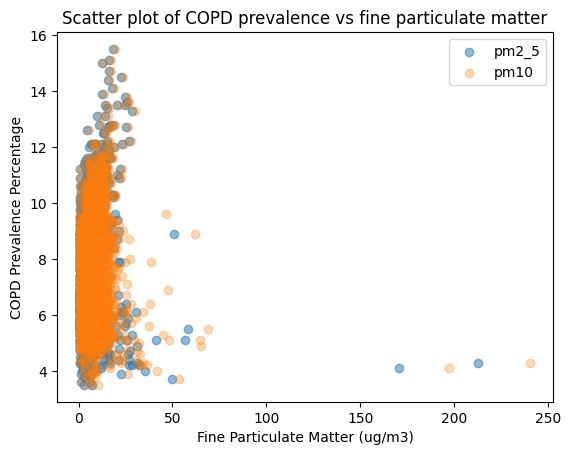

In [28]:
# use a scatter plot to check copd prevalence correlation with fine particulate matter (PM2.5 and PM10)
plt.scatter(copd_consolidated_df["pm2_5"], copd_consolidated_df["percent_copd"], alpha=0.5,label="pm2_5")
plt.scatter(copd_consolidated_df["pm10"], copd_consolidated_df["percent_copd"], alpha=0.3, label="pm10")
plt.title("Scatter plot of COPD prevalence vs fine particulate matter")
plt.legend(loc='upper right')
plt.xlabel("Fine Particulate Matter (ug/m3)")
plt.ylabel("COPD Prevalence Percentage")
plt.show()

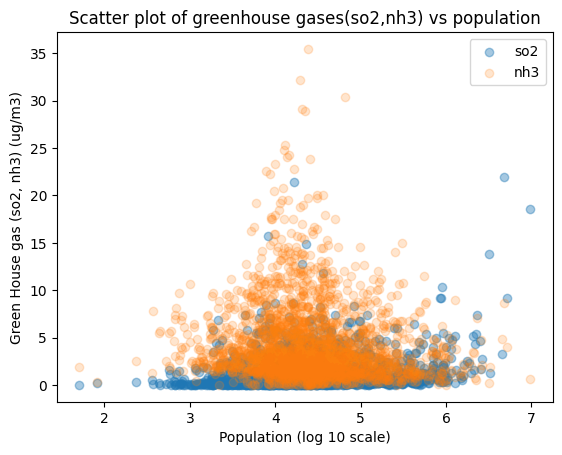

In [29]:
# use a scatter plot to check population correlation vs greenhouse gases SO2,NH3
# used log 10 scale for population (x-axis) due to scale difference with the values of SO2 and NH3 (y-axis)
plt.scatter(np.log10(copd_consolidated_df["population"]), copd_consolidated_df["so2"], alpha=0.4, label="so2")
plt.scatter(np.log10(copd_consolidated_df["population"]), copd_consolidated_df["nh3"], alpha=0.2, label="nh3")
plt.title("Scatter plot of greenhouse gases(so2,nh3) vs population")
plt.legend(loc='upper right')
plt.ylabel("Green House gas (so2, nh3) (ug/m3)")
plt.xlabel("Population (log 10 scale)")
plt.show()

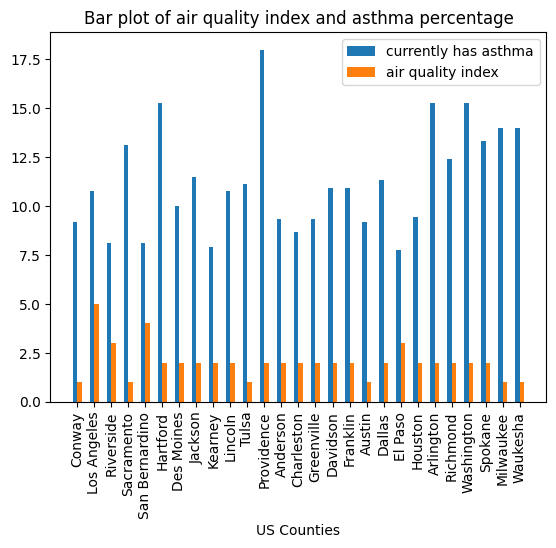

In [30]:
# bar plot of asthma percentage and air quality index on same axis for comparison between two
n=len(asthma_consolidated_df["county"].index) 
r = np.arange(n)
width = 0.25
plt.bar(r, asthma_consolidated_df["currently_has_asthma_percentage"], label="currently has asthma", width=width)
plt.bar(r+width, asthma_consolidated_df["aqi"], label="air quality index",width=width)
plt.xticks(r + width/2,asthma_consolidated_df["county"], rotation=90) 
plt.title("Bar plot of air quality index and asthma percentage")
plt.xlabel("US Counties")
plt.legend()
plt.show()

Embedded visualization from Tableau created using consolidated table data - Impact of Population on Air Quality for US Counties

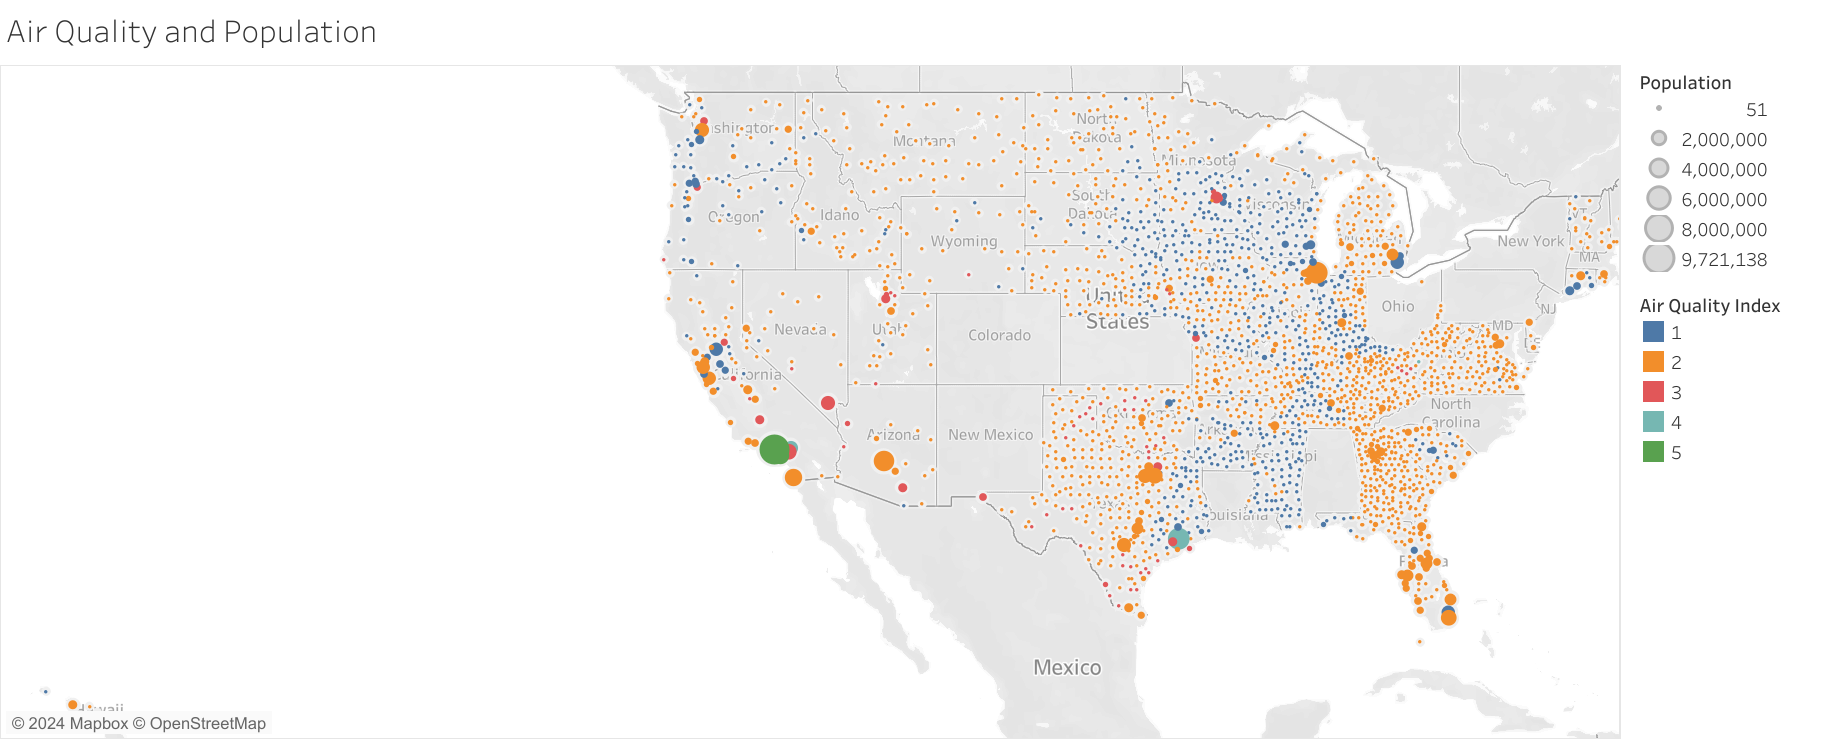

Embedded visualization from Tableau created using consolidated table data - Impact of Population on concentration of Nitogen Dioxide (Greenhouse gas) for US Counties

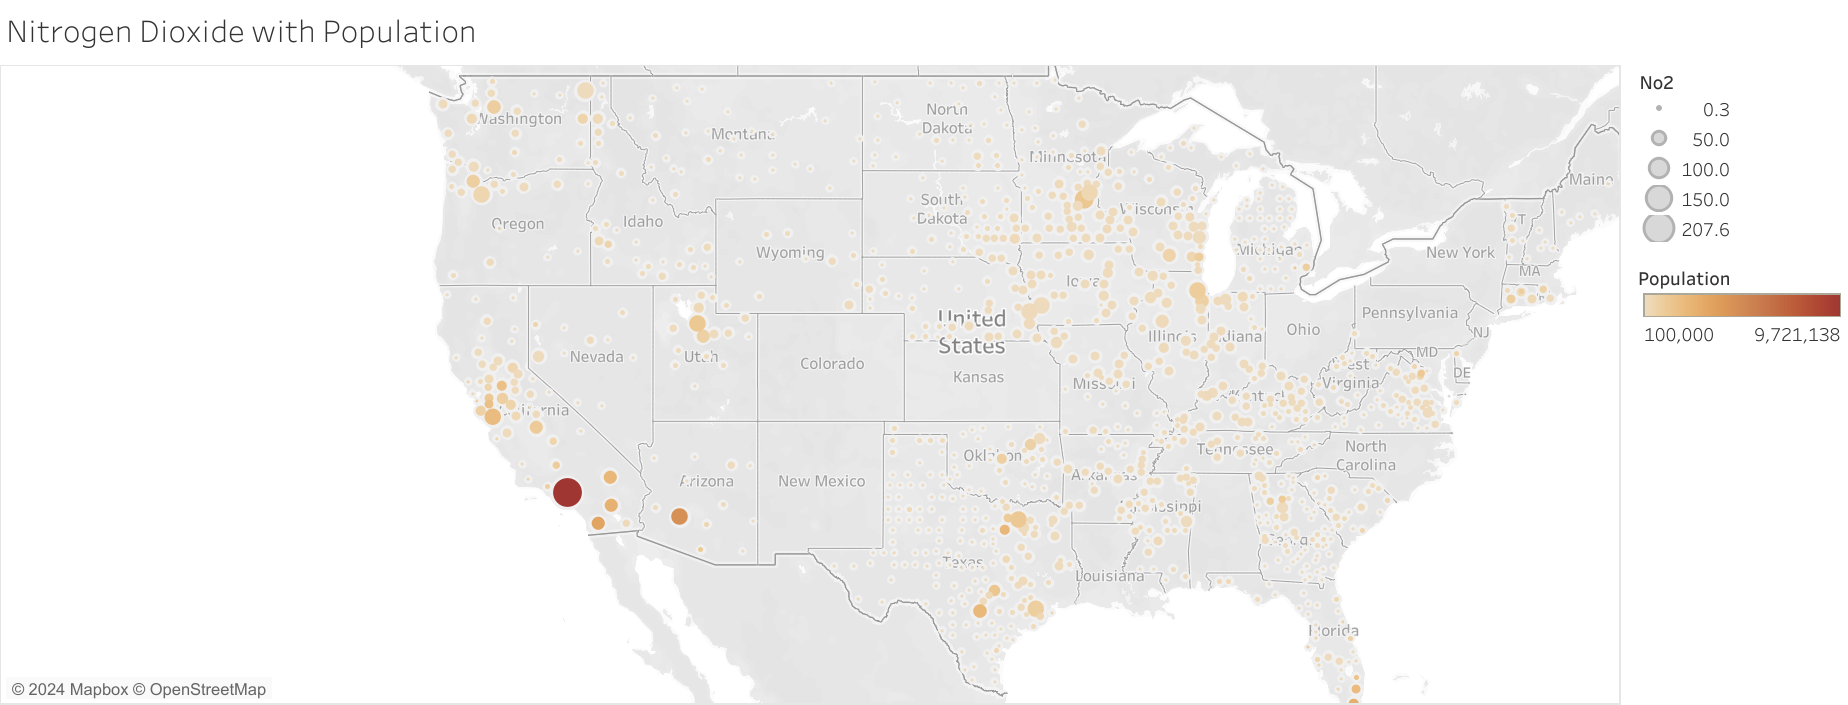

### Ethical Considerations

Our ethical responsibility is to report the outcome of data analysis honestly and truthfully. Data sources used in this study do not contain personally identifiable data, and there is no risk of data privacy breaches. As part of data wrangling, some records from the sources that had missing data were dropped, some were split into multiple records, and some were aggregated. Furthermore, some records have been dropped as part of the removal of outliers, which may also remove other associated data that might have otherwise impacted or changed the findings of this study. Hence, the transformed data used in the visualizations may not represent the population, and this study's outcomes and visualizations should be used with this awareness and diligence.

## References
About BRFSS. (n.d.). _CDC_. **https://www.cdc.gov/brfss/about/index.htm**

Wikipedia:Copyrights. (n.d.). _Wikipedia_. **https://en.wikipedia.org/wiki/Wikipedia:Copyrights**
